In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('FoodAppBusiness.csv',encoding = "utf-8")

In [3]:
data.head()

,MonthlyIncome,ActiveSinceDays,Age,Graduate,Married,Single,NoOfChildren,NoOfTeenager,NoOfDaysSinceLastPurchase,AmountSpendOnWines,...,NoOfCatalogPurchase,NoOfStorePurchase,NoOfWebVisitsMonth,PurchasedIn1stCampaign,PurchasedIn2ndCampaign,PurchasedIn3rdCampaign,PurchasedIn4thCampaign,PurchasedIn5thCampaign,TotalNoOfCampaignAccepted,CustomerComplain
0,58138,2822,63,1,0,1,0,0,58,635,...,10,4,7,0,0,0,0,0,0,0
1,46344,2272,66,1,0,1,0,0,38,11,...,1,2,5,0,0,0,0,0,0,0
2,71613,2471,55,1,1,0,0,0,26,426,...,2,10,4,0,0,0,0,0,0,0
3,26646,2298,36,1,1,0,1,0,26,11,...,0,4,6,0,0,0,0,0,0,0
4,58293,2320,39,1,1,0,1,0,94,173,...,3,6,5,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   MonthlyIncome              2205 non-null   int64
 1   ActiveSinceDays            2205 non-null   int64
 2   Age                        2205 non-null   int64
 3   Graduate                   2205 non-null   int64
 4   Married                    2205 non-null   int64
 5   Single                     2205 non-null   int64
 6   NoOfChildren               2205 non-null   int64
 7   NoOfTeenager               2205 non-null   int64
 8   NoOfDaysSinceLastPurchase  2205 non-null   int64
 9   AmountSpendOnWines         2205 non-null   int64
 10  AmountSpentOnFruits        2205 non-null   int64
 11  AmountSpentOnMeat          2205 non-null   int64
 12  AmountSpentOnFish          2205 non-null   int64
 13  AmountSpentOnSweet         2205 non-null   int64
 14  AmountSpentOnGold       

In [5]:
'''''
data.drop(['PurchasedIn1stCampaign',
           'PurchasedIn2ndCampaign',
           'PurchasedIn3rdCampaign',
           'PurchasedIn4thCampaign',
           'PurchasedIn5thCampaign'], 1, inplace=True)
'''''

"''\ndata.drop(['PurchasedIn1stCampaign',\n           'PurchasedIn2ndCampaign',\n           'PurchasedIn3rdCampaign',\n           'PurchasedIn4thCampaign',\n           'PurchasedIn5thCampaign'], 1, inplace=True)\n"

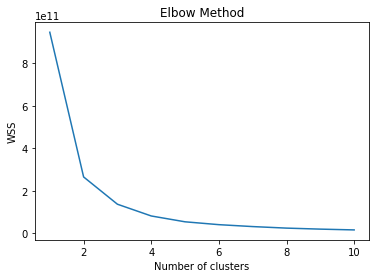

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# คำนวณ wss สำหรับแต่ละค่า k
wss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

# พล็อตกราฟ wss เทียบกับจำนวน clusters k
plt.plot(range(1,11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

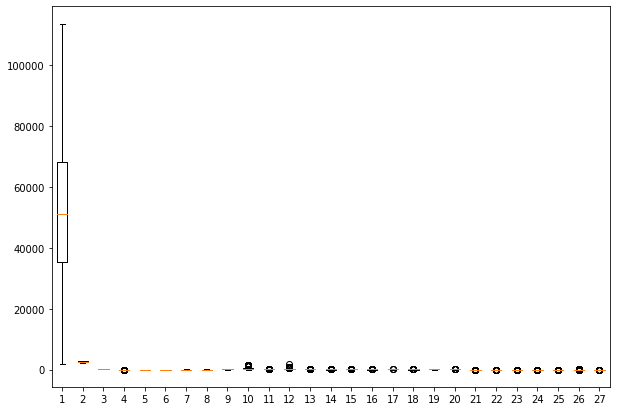

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

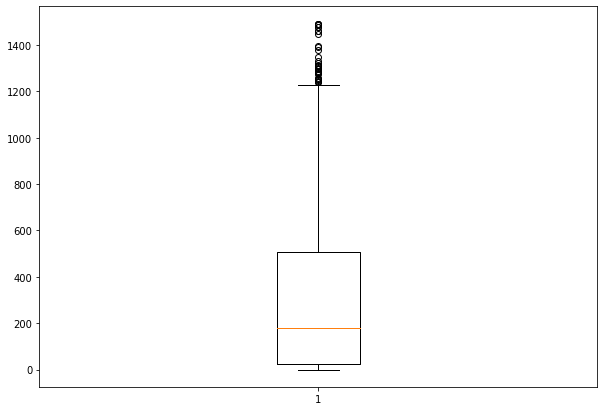

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(data['AmountSpendOnWines'])
 
# show plot
plt.show()

In [8]:
#data = data.astype('float')

In [8]:
#data.info()NoOfChildren

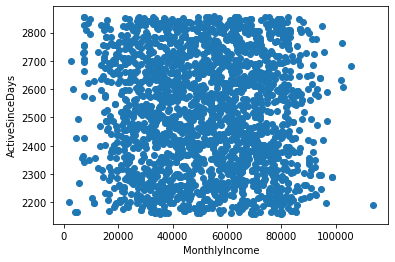

In [14]:
fig = plt.figure(1,figsize=(6,4))
plt.scatter(data['MonthlyIncome'],data['ActiveSinceDays'])
plt.xlabel("MonthlyIncome")
plt.ylabel('ActiveSinceDays')
plt.show()

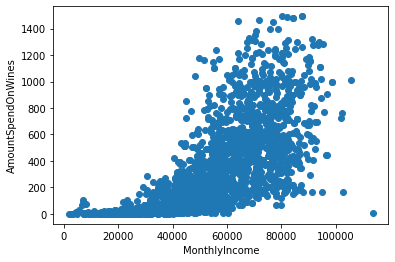

In [15]:
fig = plt.figure(1,figsize=(6,4))
plt.scatter(data['MonthlyIncome'],data['AmountSpendOnWines'])
plt.xlabel("MonthlyIncome")
plt.ylabel('AmountSpendOnWines')
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
clustering2 = AgglomerativeClustering(n_clusters=3).fit(data)
print("n_clusters=2",clustering2)
print(clustering2.labels_)

df = pd.DataFrame(clustering2.labels_)
df.to_csv('Agglomerative.csv')

n_clusters=2 AgglomerativeClustering(n_clusters=3)
[0 0 1 ... 0 1 0]


In [12]:
from sklearn.cluster import DBSCAN
dataX = pd.read_csv('FoodAppBusiness.csv',encoding = "utf-8")


clustering_DBSCAN = DBSCAN(eps=0.5, min_samples=10).fit(data)
print(clustering_DBSCAN)
print(clustering_DBSCAN.labels_)

df = pd.DataFrame(clustering_DBSCAN.labels_)
df.to_csv('DBSCAN.csv')


DBSCAN(min_samples=10)
[-1 -1 -1 ... -1 -1 -1]


In [13]:
from sklearn.cluster import KMeans

In [17]:
kmeans_c2 = KMeans(n_clusters=3, random_state=440).fit(data)
print("kmeans labels",kmeans_c2.labels_)
print("kmeans cluster_centers",kmeans_c2.cluster_centers_)

df = pd.DataFrame(kmeans_c2.labels_)
df.to_csv('kmeans_c2.csv')

kmeans labels [0 0 1 ... 0 1 0]
kmeans cluster_centers [[ 5.14647795e+04  2.52156161e+03  5.37224384e+01  9.23476005e-01
   6.42023346e-01  3.57976654e-01  2.71076524e-01  5.30479896e-01
   4.96562905e+01  2.69935149e+02  1.75862516e+01  9.13696498e+01
   2.40350195e+01  1.68962387e+01  4.38754864e+01  3.08430610e+00
   4.60830091e+00  2.13229572e+00  5.91699092e+00  5.75356680e+00
   1.68612192e-02  1.42671855e-02  6.61478599e-02  8.30090791e-02
   3.89105058e-03  1.84176394e-01  5.18806744e-03]
 [ 7.54994553e+04  2.50356564e+03  5.26215084e+01  9.21787709e-01
   6.39664804e-01  3.60335196e-01  6.84357542e-02  2.54189944e-01
   4.89818436e+01  6.22554469e+02  5.65670391e+01  3.85688547e+02
   8.13337989e+01  5.93533520e+01  7.09553073e+01  1.66480447e+00
   5.53351955e+00  5.32122905e+00  8.49301676e+00  3.30865922e+00
   1.78770950e-01  2.65363128e-02  7.12290503e-02  1.35474860e-01
   2.20670391e-01  6.32681564e-01  6.98324022e-03]
 [ 2.79801727e+04  2.51234958e+03  4.67534819e+01  

In [15]:
data_aag = pd.read_csv('Agglomerative.csv',encoding = "utf-8")
data_aag['B'].unique()

KeyError: 'B'